Function with more than one input image are causing some problems which is quite annoying but we want to find out what the problem is in this notebook. We will work with the most basic functions to try to understand what is happening. We will also be working from a workflow in order to use the functions already generated:

In [1]:
import napari_workflows
from napari_workflows._io_yaml_v1 import load_workflow
from napari.types import ImageData
import napari
import napari_pyclesperanto_assistant
from napari_pyclesperanto_assistant._workflow_io_utility import *
from skimage.io import imread
import numpy as np


def multiply(image1: ImageData, image2: ImageData) -> ImageData:
    return (image1*image2)

workflow = napari_workflows.Workflow()
workflow.set('Result of multiply', multiply, 'image1', 'image2')

Creating a viewer and adding two different images on which to apply the function shown above:

In [2]:
desktop = 'C:/Users/ryans/Onedrive/Desktop/'
image1 = imread(desktop + 'blobs.tif')
image2 = imread(desktop + 'blobs_messed_up.tiff')

viewer = napari.Viewer()
viewer.add_image(image1)
viewer.add_image(image2)

C:\Users\ryans\Anaconda3\envs\np_workflows_v1\lib\site-packages\napari_tools_menu\__init__.py:165: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


<Image layer 'image2' at 0x21063426f40>

Here we are setting the signature as we would when loading other workflow steps (checking if this works):

In [3]:
wf_step_name = 'Result of multiply'

func = workflow._tasks[wf_step_name][0]

signat = signature_w_kwargs_from_function(workflow=workflow,
                                          wf_step_name=wf_step_name)
signat

<Signature (image1: <function NewType.<locals>.new_type at 0x0000021052159D30>, image2: <function NewType.<locals>.new_type at 0x0000021052159D30>) -> <function NewType.<locals>.new_type at 0x0000021052159D30>>

So this seems to work fine. Now we will make the widget but change the autocall behaviour to False since it seems to be calling the function before it has created both comboboxes for selecting the images:

In [4]:
widget = make_flexible_gui(func, 
                           viewer, 
                           wf_step_name= wf_step_name,
                           autocall=False)

In [5]:
viewer.window.add_dock_widget(widget, name = wf_step_name[10:])

This works and doesn't throw an error which is interesting. If we create another widget with the autocall behaviour set to true we get:

In [6]:
widget2 = make_flexible_gui(func, 
                            viewer, 
                            wf_step_name= wf_step_name,
                            autocall=True)
viewer.window.add_dock_widget(widget2, name = wf_step_name[10:] + '-2')

TypeError: unsupported operand type(s) for *: 'int' and 'NoneType'

Here we get an error. The interesting thing is that if we takea look at napari, both widgets are there and both are indeed working. This means it could be possible that we can get around this error with a try and except (which I would like to avoid though)..

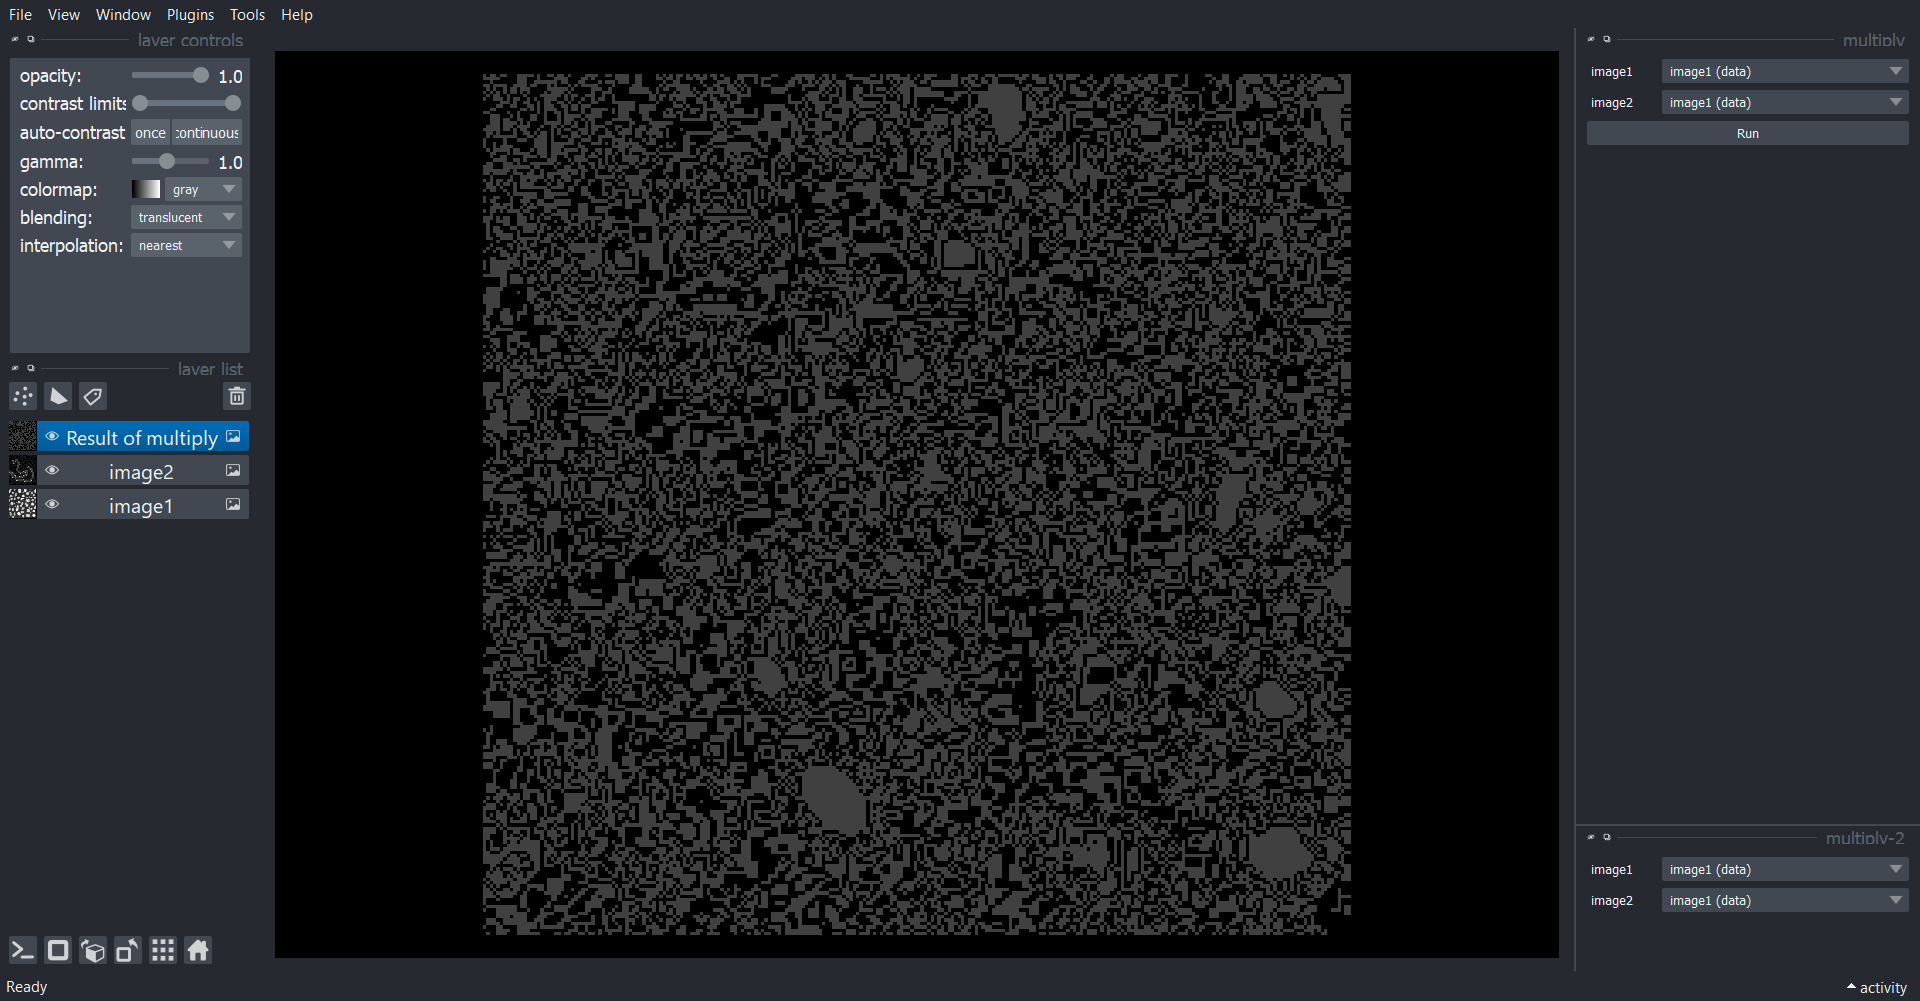

In [7]:
napari.utils.nbscreenshot(viewer)

In [9]:
widget()

In [10]:
set_choices(workflow,wf_step_name,viewer,widget)

In [11]:
widget()